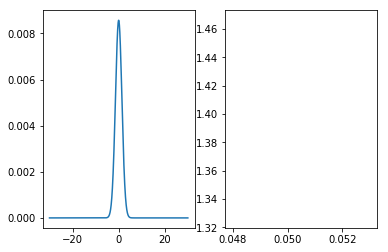

NameError: name 'time' is not defined

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import scipy.fftpack as ft
from numpy import linalg as LA
import time
import matplotlib.animation

#%% Set parameters and grid size

hbar = 1
m = 1

Ngrid = 2000
xmin = -30
xmax = 30

x = np.linspace(xmin,xmax,Ngrid)
dx = np.diff(x).mean()

k = ft.fftfreq(x.size,d = dx)
k = 2*np.pi*ft.fftshift(k)
dk = np.diff(k).mean()

# define potential (in real space) and kinetic energy (in k-space)

## potential well with high walls
#Vpot = np.zeros(x.size)
#Vpot[x>0] = 0
#Vpot[x<-20] = 1e6
#Vpot[x>20] = 1e6

# harmonic oscillator
omega = 2*np.pi*0.5
Vpot = (m/2)*omega**2*x**2


Ekin = hbar**2*k**2/(2*m)

# initial state: Gaussian wave packet with mean k and mean x
#sig = np.sqrt(hbar/(m*omega))
sig = 2
x0 = 0
k0 = 0
#k0 = 100*dk
Psi = np.exp(-(x-x0)**2/(2*sig**2))
Psi = Psi/np.sqrt(np.sum(np.abs(Psi)**2))
Psik = ft.fftshift(ft.fft(Psi))
Psik = np.roll(Psik,np.int(np.round(k0/dk)))
Psi = ft.ifft(ft.fftshift(Psik))

dt = 0.5e-3
tfin = 8;

M = round(tfin/dt)

ts = np.nan*np.ones(M)
calcval = np.nan*np.ones(M)
calcval2 = np.nan*np.ones(M)

fig = plt.figure(1)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

t = 0
count=0
valcount=0
for m in range(0,M,1):
    t = t+dt
    count = count+1
    #print(t)
    Psi = np.exp(-1j*Vpot/hbar*dt)*Psi         # advance in real-space
    Psik = ft.fftshift(ft.fft(Psi));           # Fourier transform
    Psik = np.exp(-1j*Ekin/hbar*dt)*Psik;      # advance in Fourier space
    Psi = ft.ifft(ft.fftshift(Psik));          # return to real space
    
    if count>100:
        count=0
        
        #calculate mean values to plot
        ts[valcount]=t
        meank = np.sum(np.conj(Psik)*k*Psik)
        meank = np.real(meank)
        meank2 = np.sum(np.conj(Psik)*k**2*Psik)
        meank2 = np.real(meank2)
        meanx = np.sum(np.conj(Psi)*x*Psi)
        meanx = np.real(meanx)
        meanx2 = np.sum(np.conj(Psi)*x**2*Psi)
        meanx2 = np.real(meanx2)
        
        calcval[valcount] = np.sqrt(meanx2-meanx**2)
        calcval2[valcount] = np.sqrt(meank2-meank**2)
        valcount+=1
        
        ax1.cla()
        ax1.plot(x,np.power(np.abs(Psi),2))
        #ax2.cla()
        ax2.plot(ts,calcval)
        #ax2.plot(ts,calcval2)
        #ax2.plot(k,np.power(np.abs(Psik),2))

        fig.canvas.draw()
        plt.pause(0.0001)
        #plt.show()